<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     318 non-null    int64 
 1   tweet_text   318 non-null    object
 2   class_label  318 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.6+ KB
None
           tweet_id
count    318.000000
mean   39272.817610
std     1048.256999
min    37436.000000
25%    38291.750000
50%    39425.500000
75%    40161.250000
max    40972.000000


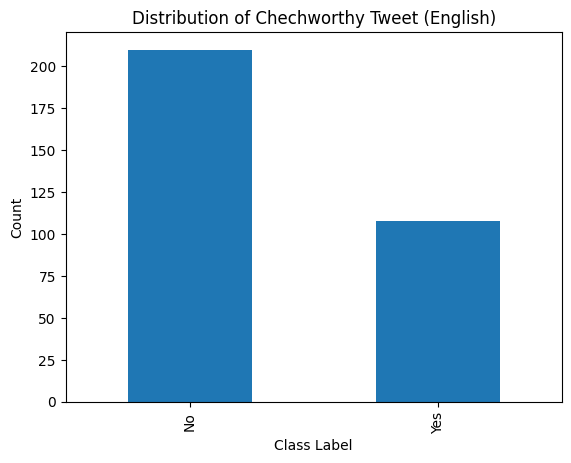

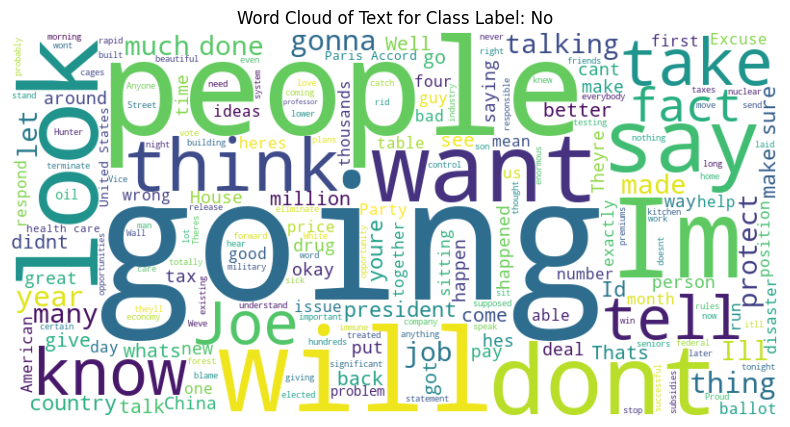

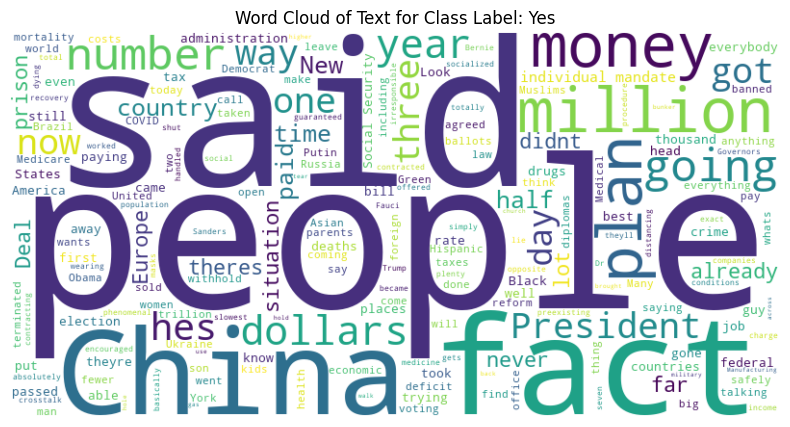

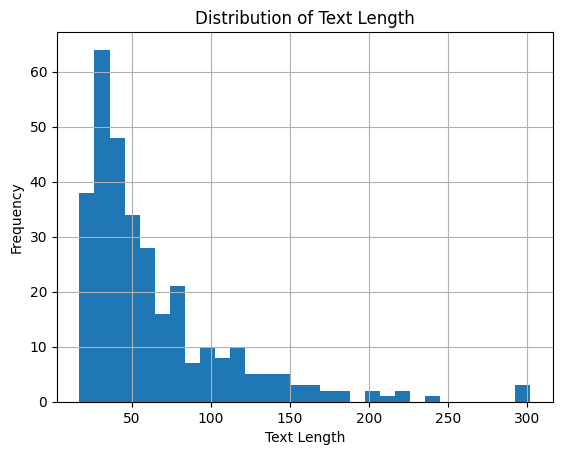

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     666 non-null    int64 
 1   tweet_text   666 non-null    object
 2   class_label  666 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.7+ KB
None
           tweet_id
count  6.660000e+02
mean   1.338581e+18
std    4.249292e+16
min    1.245275e+18
25%    1.316412e+18
50%    1.350477e+18
75%    1.368154e+18
max    1.399356e+18


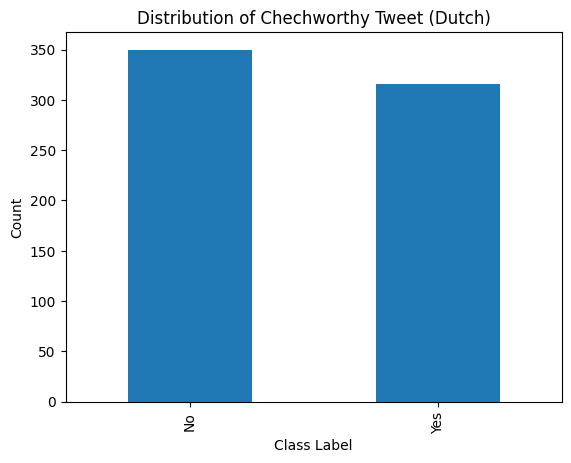

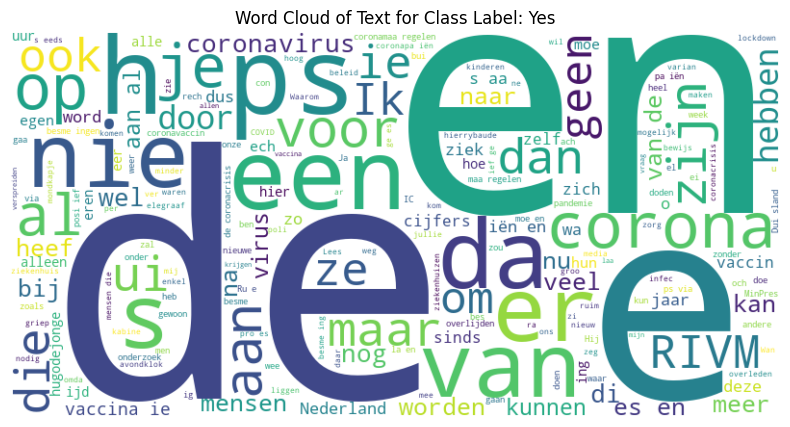

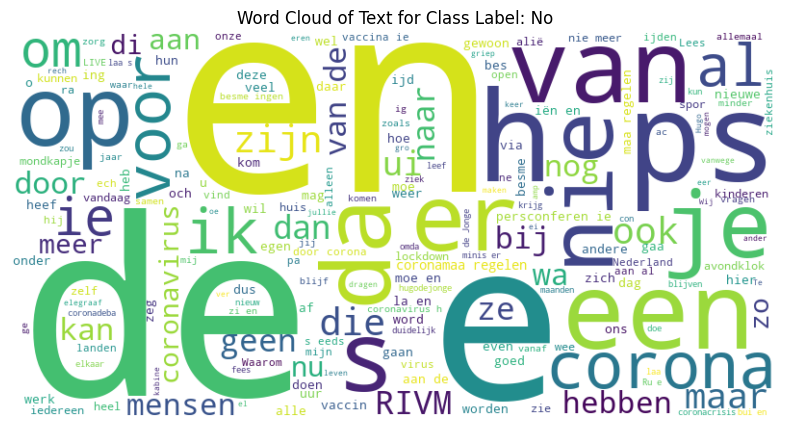

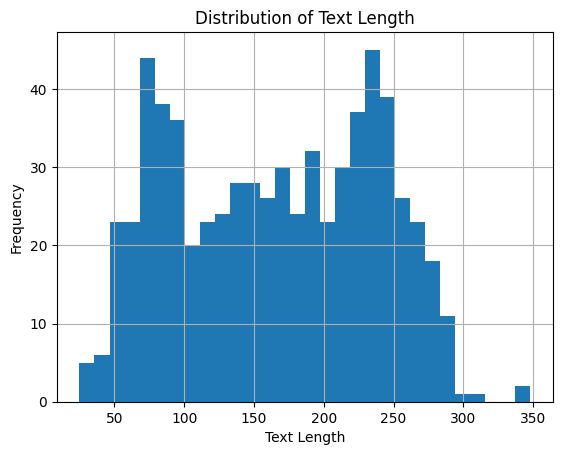

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     500 non-null    int64 
 1   tweet_text   500 non-null    object
 2   class_label  500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB
None
           tweet_id
count  5.000000e+02
mean   1.484131e+18
std    6.835560e+16
min    8.892013e+17
25%    1.480815e+18
50%    1.488589e+18
75%    1.519206e+18
max    1.563549e+18


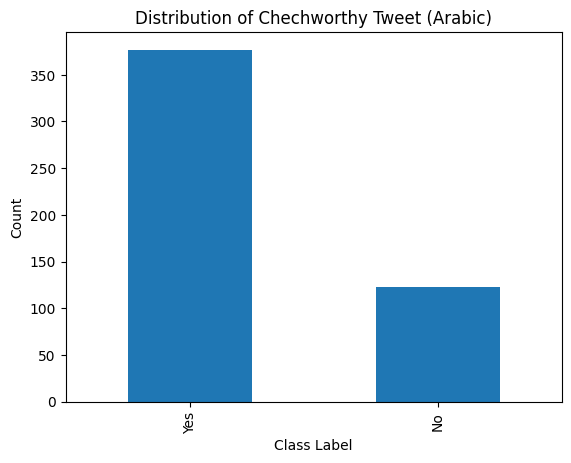

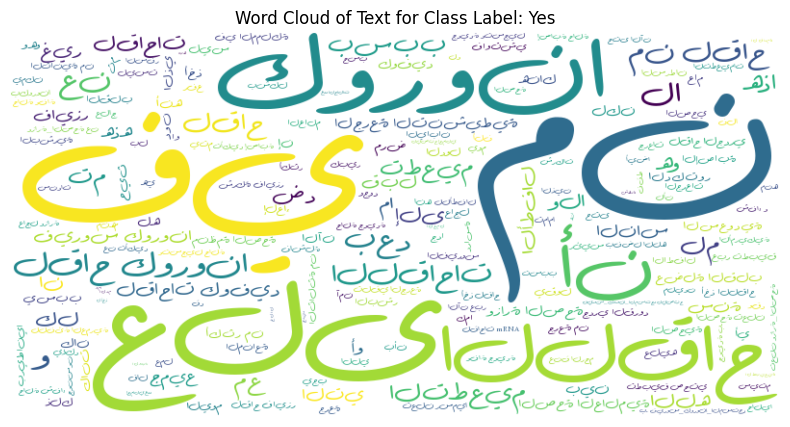

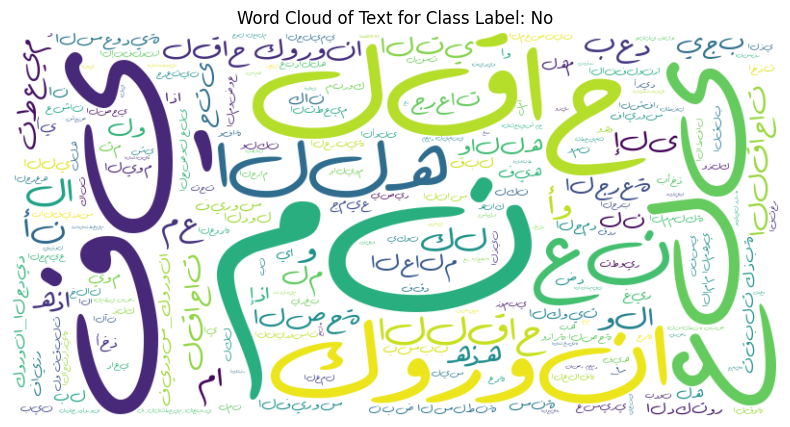

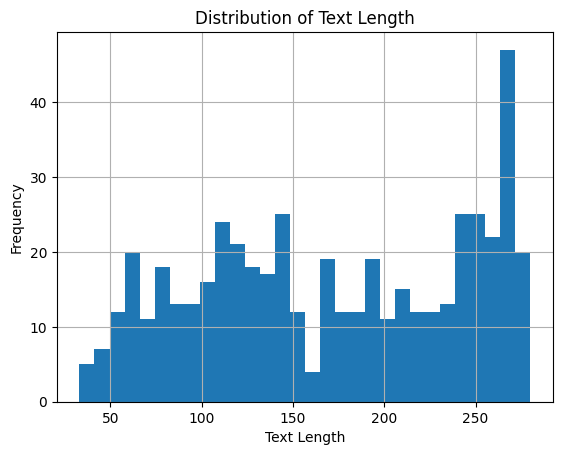

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def explore_data(csv_file, lang):
    # Load the data
    train_data = pd.read_csv(csv_file)

    # Check data structure
    print(train_data.info())

    # Summary statistics
    print(train_data.describe())

    # Distribution of classes
    class_counts = train_data['class_label'].value_counts()
    class_counts.plot(kind='bar')
    plt.title('Distribution of Chechworthy Tweet ('+lang+')')
    plt.xlabel('Class Label')
    plt.ylabel('Count')
    plt.show()

    # Generate word clouds for each class label
    class_labels = train_data['class_label'].unique()

    for label in class_labels:
        # Filter data by class label
        subset_data = train_data[train_data['class_label'] == label]

        # Generate word cloud
        if lang == "Arabic":
            wordcloud = WordCloud(font_path=r'\a-arslan-wessam-a-a-arslan-wessam-a\(A) Arslan Wessam A (A) Arslan Wessam A\(A) Arslan Wessam A (A) Arslan Wessam A.ttf', width=800, height=400, background_color='white').generate(' '.join(subset_data['tweet_text']))
        else:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(subset_data['tweet_text']))

        # Plot word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud of Text for Class Label: {label}')
        plt.show()

    # Text length analysis
    train_data['Text_Length'] = train_data['tweet_text'].apply(len)
    train_data['Text_Length'].hist(bins=30)
    plt.title('Distribution of Text Length')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
explore_data("../data/processed_data/CT24_checkworthy_english/CT24_checkworthy_english_dev-test_preprocessed.csv", "English")
explore_data("../data/processed_data/CT24_checkworthy_dutch/CT24_checkworthy_dutch_dev-test_preprocessed.csv", "Dutch")
explore_data("../data/processed_data/CT24_checkworthy_arabic/CT24_checkworthy_arabic_dev-test_preprocessed.csv", "Arabic")
